## Using features extracted from intensity profiles
## K-means clustering applied to features
## PCA to reduce dimensions and plot

In [ ]:
!pip install adjustText

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.cluster import KMeans
from adjustText import adjust_text
from sklearn.metrics import silhouette_score

In [ ]:
import matplotlib.pylab as pylab
params = {
    'font.size': 12,
    'legend.fontsize':'large',
    'figure.titlesize':'large',
    'axes.grid':False,
    'axes.labelsize':'large',
    'axes.titlesize':'large',
    'xtick.labelsize':'large',
    'ytick.labelsize':'large',
    #'figure.figsize': (5, 6)
    }
pylab.rcParams.update(params)

In [ ]:
def get_loading_scores(pca_component):
    loading_scores = pd.Series(pca.components_[pca_component],index=indices)
    sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
    #print(sorted_loading_scores.index.values)
    print(sorted_loading_scores)
    print(f'\nsum of loading scores = {sum(sorted_loading_scores**2):.6f}')
    print(f'\nRelevant attributes for PC1:{sorted_loading_scores[sorted_loading_scores>np.sqrt(1/n_attributes)].index.values.astype(str).tolist()}')
    print(f'==============================================')
    return


def plot_pca_with_clusters(pca_df, x_axis='PC1', y_axis='PC3', data=''):
    adjust_location = 0.1
    if data == 'experiment': # experimental data
      round_one_cells = [0, 20, 34, 49, 73, 86, 94, 117]
    elif data == 'toy-similar': # similar toy data
      round_one_cells = [0, 10, 20, 30]
    elif data =='toy-dissimilar': # dissimilar toy data
      round_one_cells = [0, 11, 24, 31, 37, 47]

    fig, ax = plt.subplots(figsize=(6, 6))
    unique_clusters = pca_df['Cluster'].unique()
    num_clusters = len(unique_clusters)
    color_palette = sns.color_palette("tab10", num_clusters)
    ax = sns.scatterplot(x=x_axis, y=y_axis, data=pca_df, style='Plaque', s=75, ec=None, hue='Cluster', palette=color_palette)

    for round_one_cell in round_one_cells:
        ax.scatter(pca_df[x_axis].loc[round_one_cell], pca_df[y_axis].loc[round_one_cell], s=150, facecolors='none',
                    edgecolors='k')
        ax.annotate(f'P{round_one_cells.index(round_one_cell) + 1}C1',
                    (pca_df[x_axis].loc[round_one_cell], pca_df[y_axis].loc[round_one_cell] - adjust_location),
                    ha='center', va='top', size='medium')
    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, fancybox=True, shadow=True)
    plt.show()
    return


def plot_kmeans(pca_df, x_axis='', y_axis='', data=''):
    adjust_location = 0.1
    if data == 'experiment': # experimental data
      round_one_cells = [0, 20, 34, 49, 73, 86, 94, 117]
    elif data == 'toy-similar': # similar toy data
      round_one_cells = [0, 10, 20, 30]
    elif data =='toy-dissimilar': # dissimilar toy data
      round_one_cells = [0, 11, 24, 31, 37, 47]

    fig, ax = plt.subplots(figsize=(6, 6))
    annot = []
    xs = []
    ys = []
    texts = []
    unique_clusters = pca_df['Cluster'].unique()
    num_clusters = len(unique_clusters)
    color_palette = sns.color_palette('magma', num_clusters)
    ax = sns.scatterplot(x=x_axis, y=y_axis, data=pca_df, style='Plaque', s=75, ec=None, hue='Cluster', palette=color_palette)

    for round_one_cell in round_one_cells:
        xs.append(pca_df[x_axis].loc[round_one_cell])
        ys.append(pca_df[y_axis].loc[round_one_cell])
        annot.append(f'P{round_one_cells.index(round_one_cell) + 1}C1')
        ax.scatter(pca_df[x_axis].loc[round_one_cell], pca_df[y_axis].loc[round_one_cell], s=150, facecolors='none',
                    edgecolors='k')
        # ax.annotate(f'P{round_one_cells.index(round_one_cell) + 1}C1',
        #             (pca_df[x_axis].loc[round_one_cell], pca_df[y_axis].loc[round_one_cell] - adjust_location),
        #             ha='center', va='top', size='medium')
    for x, y, s in zip(xs, ys, annot):
        texts.append(plt.text(x, y, s))
    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)
    adjust_text(texts, only_move={'points':'y', 'texts':'y'}, expand=(1.2, 2), arrowprops=dict(arrowstyle="->", color='k', lw=1.))
    plt.legend(loc='upper center', labelspacing=0.1, bbox_to_anchor=(0.5, -0.1), ncol=4, fancybox=False, shadow=False)
    plt.show()
    return

In [ ]:
file_name = 'experimental data - attributes.xlsx'
sheet_name = 'all plaques'
n_rows = 153
data = 'experiment'
plaque_markers_dict = {1: '*',2: 'o',3: '<',4: 'D',5: 'X',6: 's',7: '^',8: 'p'}

# file_name = 'S1.xlsx'
# sheet_name = 'attributes'
# n_rows = 40
# data = 'toy-similar'
# plaque_markers_dict = {1: '*',2: 'o',3: '<',4: 'D'}

# file_name = 'S2.xlsx'
# sheet_name = 'attributes'
# n_rows = 40
# data = 'toy-similar'
# plaque_markers_dict = {1: '*',2: 'o',3: '<',4: 'D'}

# file_name = 'S3.xlsx'
# sheet_name = 'attributes'
# n_rows = 56
# data = 'toy-dissimilar'
# plaque_markers_dict = {1: '*',2: 'o',3: '<',4: 'D',5: 'X',6: 's'}

attributes_df = pd.read_excel(file_name, sheet_name, nrows=n_rows)
attributes_df = attributes_df.drop(labels=['Unnamed: 0', 'Cell #', 'Plaque', 'Cell ID'], axis=1)
if sheet_name == 'all plaques with xy':
  indices = ['GFP max', 'Infection time', 'Rise time', 'Lysis time', 'Infection duration', 'Rise rate', 'Area', 'X coordinate', 'Y coordinate']
  columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']
  legend_annotations = 'A - Area\nB - Infection time\nC - GFP max\nD - Infection duration\nE - Lysis time\nF - Rise rate\nG - Rise time\nH - X coordinate\nI - Y coordinate'
  n_attributes = 9
  n_components = n_attributes

else:
  indices = ['GFP max', 'Infection time', 'Rise time', 'Lysis time', 'Infection duration', 'Rise rate', 'Area']
  columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
  legend_annotations = 'A - Area\nB - Infection time\nC - GFP max\nD - Infection duration\nE - Lysis time\nF - Rise rate\nG - Rise time'
  n_attributes = 7
  n_components = n_attributes

scaled_data = StandardScaler().fit_transform(attributes_df)
# pd.DataFrame(scaled_data, columns=attributes_df.columns)

0.4140449624901246


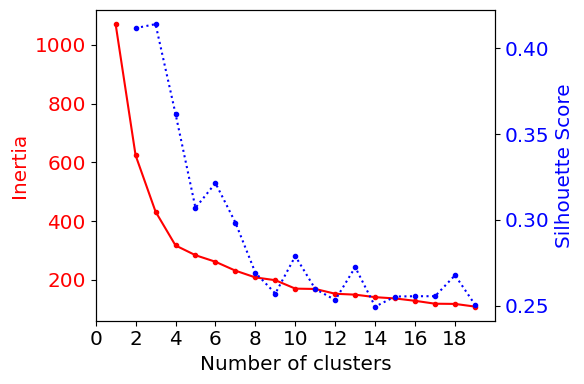

In [ ]:
SSE = []
silhouette_scores = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++', n_init='auto')
    kmeans.fit(scaled_data)
    SSE.append(kmeans.inertia_)

    if cluster > 1:  # Silhouette score not defined for a single cluster
        silhouette_avg = silhouette_score(scaled_data, kmeans.labels_, random_state=42)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(np.nan)  # For single cluster, silhouette score is NaN


SSE_derivative = np.empty_like(SSE)
SSE_derivative[0] = np.nan
SSE_derivative[1:] = np.diff(SSE)
km_df = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE, 'SSE derivative':SSE_derivative, 'Silhouette Score': silhouette_scores})

fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.plot(km_df['Cluster'], km_df['SSE'], marker='.', label='SSE', color='red')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_xticks(range(0, 20, 2))
ax1.set_xlim([0,20])

ax2 = ax1.twinx()
ax2.plot(km_df['Cluster'], km_df['Silhouette Score'], ':', marker='.', label='Silhouette Score', color='blue')
ax2.set_ylabel('Silhouette Score', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
print(km_df['Silhouette Score'].max())
# ax2 = ax1.twinx()
# ax2.set_ylabel('Derivative of SSE')
# ax2.plot(km_df['Cluster'], SSE_derivative, color='red', linestyle='-', marker='s', label='SSE derivative')
# lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax1.set_title('Elbow Method for Optimal k')
# ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right')
plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init='k-means++', n_init='auto')
kmeans.fit(scaled_data)
pred = kmeans.predict(scaled_data)

In [ ]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns=columns)
pca_df['Cluster'] = pred

print(f'\nAttribute is important if loading score > {np.sqrt(1/n_attributes):.6f}')
print(f'--------------------------------------------\n')
get_loading_scores(0)
get_loading_scores(1)
get_loading_scores(2)


Attribute is important if loading score > 0.377964
--------------------------------------------

Lysis time            0.487036
Infection time        0.425212
Infection duration    0.425142
Rise rate             0.416523
Rise time             0.330763
GFP max               0.313865
Area                  0.140845
dtype: float64

sum of loading scores = 1.000000

Relevant attributes for PC1:['Lysis time', 'Infection time', 'Infection duration', 'Rise rate']
Area                  0.620808
GFP max               0.488033
Rise time             0.429041
Infection duration    0.316766
Infection time        0.210729
Rise rate             0.205540
Lysis time            0.073148
dtype: float64

sum of loading scores = 1.000000

Relevant attributes for PC1:['Area', 'GFP max', 'Rise time']
Infection time        0.554445
Rise rate             0.545256
Lysis time            0.430716
Rise time             0.334283
GFP max               0.278164
Area                  0.114850
Infection duration    0.0

In [ ]:
results_df = pd.read_excel(file_name, sheet_name, nrows=n_rows)
results_df = results_df.drop(labels=['Unnamed: 0'], axis=1)
results_df['Cluster'] = pred
# print(results_df['Cluster'].value_counts())
# print(results_df.head())

pca_df['Plaque'] = results_df['Plaque']
pca_df['Cell #'] = results_df['Cell #']
pca_df['Cell ID'] = results_df['Cell ID']
# pca_df

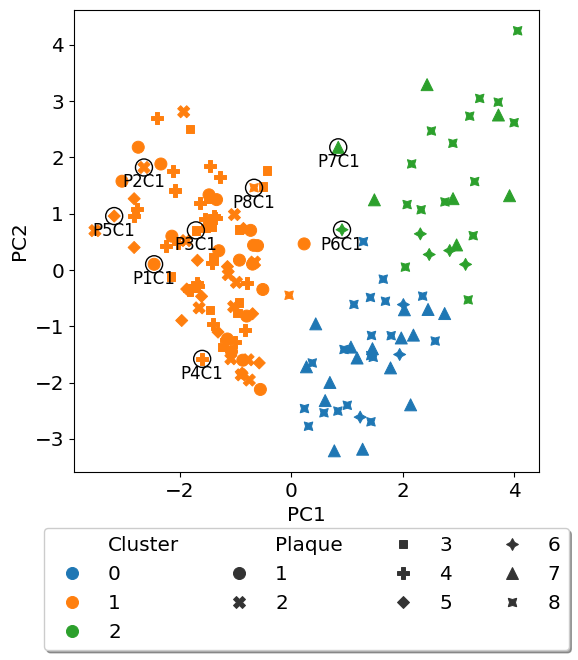

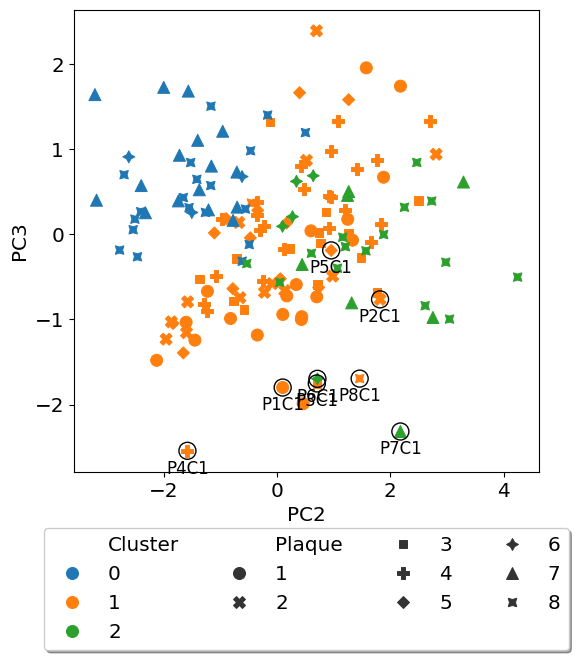

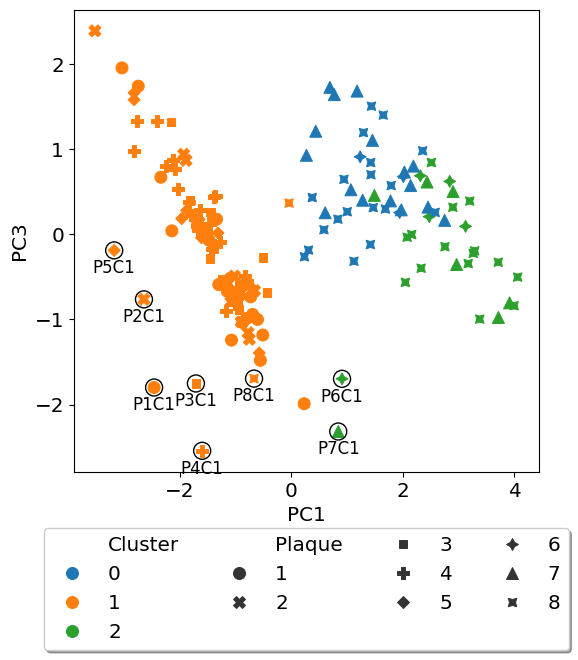

In [ ]:
plot_pca_with_clusters(pca_df, x_axis='PC1', y_axis='PC2', data=data)
plot_pca_with_clusters(pca_df, x_axis='PC2', y_axis='PC3', data=data)
plot_pca_with_clusters(pca_df, x_axis='PC1', y_axis='PC3', data=data)

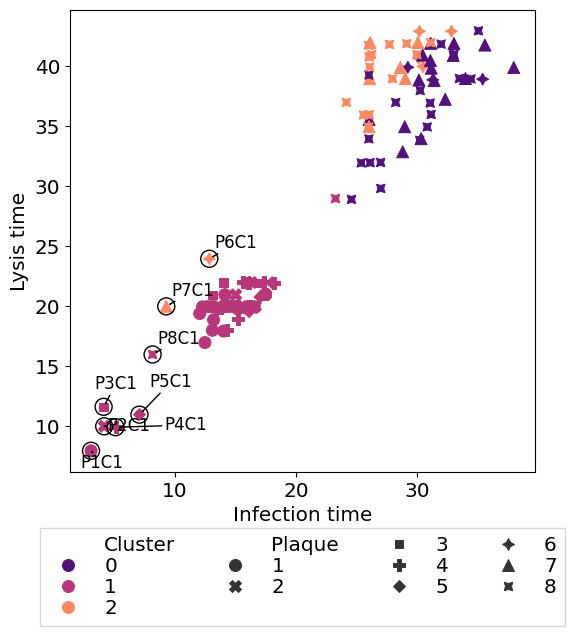

Cluster
1    88
0    38
2    27
Name: count, dtype: int64


In [ ]:
kmeans_df = pd.read_excel(file_name, sheet_name, nrows=n_rows)
kmeans_df = kmeans_df.drop(labels=['Unnamed: 0'], axis=1)
kmeans_df['Cluster'] = pred
kmeans_df['Plaque marker'] = kmeans_df['Plaque'].map(plaque_markers_dict)

plot_kmeans(kmeans_df, x_axis='Infection time', y_axis='Lysis time', data=data)
print(kmeans_df['Cluster'].value_counts())